In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras.layers as kl
import keras.optimizers as kopt
import keras.losses as kloss
from keras.models import Model
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import gc

# The RNN model implementation 

In [27]:
#loading the Training Data
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")

In [28]:
Y_train = Y_train.reshape((Y_train.shape[0], 1))
print(X_train.shape)
print(Y_train.shape)

(8309, 100, 64)
(8309, 1)


In [29]:
#get subset for testinh
subset = 5000
X_train = X_train[:subset]
Y_train = Y_train[:subset]

In [30]:
#loading the Evaluation Data
X_eval = np.load("X_eval.npy")
Y_eval = np.load("Y_eval.npy")

In [31]:
Y_eval = Y_eval.reshape((Y_eval.shape[0], 1))
print(X_eval.shape)
print(Y_eval.shape)

(1039, 100, 64)
(1039, 1)


## Creating a simple RNN model

In [39]:
#creating simple RNN model
def create_simple_rnn(input_shape):
    
    inputs = kl.Input(input_shape)
    rnn = kl.SimpleRNN(units=2048, activation="tanh", return_sequences=False)(inputs)
    dense1 = kl.Dense(units=512, activation="relu")(rnn)
    outputs =kl.Dense(units=1, activation="sigmoid")(dense1)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [33]:
def create_simple_deep_rnn(input_shape):
    inputs = kl.Input(input_shape)
    
    rnn1 = kl.SimpleRNN(units=1024, activation="tanh", return_sequences=True)(inputs)
    rnn2 = kl.SimpleRNN(units=1024, activation="tanh", return_sequences=False)(rnn1)

    dense1 = kl.Dense(units=512, activation="relu")(rnn2)
    norm1 = kl.BatchNormalization()(dense1)
    dense2 = kl.Dense(units=256, activation="relu")(rnn2)
    norm2 = kl.BatchNormalization()(dense2)
    outputs = kl.Dense(units=1, activation="sigmoid")(dense1)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [34]:
def create_conv_model(input_shape):
    inputs = kl.Input(input_shape)

    conv1 = kl.Conv1D(filters=64, kernel_size=7, activation="relu")(inputs)
    pool1 = kl.MaxPooling1D()(conv1)
    conv2 = kl.Conv1D(filters=128, kernel_size=3, activation="relu")(pool1)
    pool2 = kl.MaxPooling1D()(conv2)

    dense1 = kl.Dense(units=128, activation="relu")(pool2)
    dense2 = kl.Dense(units=128, activation="relu")(dense1)
    outputs = kl.Dense(units=1, activation="sigmoid")(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model


In [43]:
simple_rnn = create_simple_rnn((25, X_train.shape[-1]))
simple_rnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 25, 64)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 2048)              4327424   
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,377,025
Trainable params: 5,377,025
Non-trainable params: 0
_________________________________________________________________


In [44]:
loss = kloss.BinaryCrossentropy(from_logits=False)
optimizer = kopt.Adam(learning_rate=0.001, clipvalue=0.5)
simple_rnn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [45]:
#training the model 
history = simple_rnn.fit(X_train[:, :25], Y_train, epochs=1, batch_size=64, validation_data=(X_eval[:, :25], Y_eval))

79/79 [==============================] - 49s 615ms/step - loss: 0.9413 - accuracy: 0.5272 - val_loss: 0.6935 - val_accuracy: 0.5188


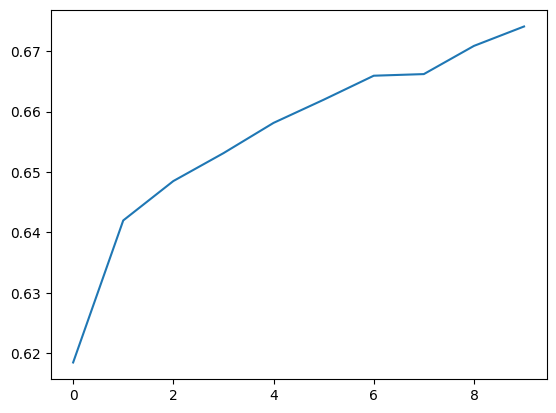

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
del X_train, Y_train, X_eval, Y_eval
gc.collect()

5277